In [1]:
from fastai.vision.all import *
from fastbook import *

In [2]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

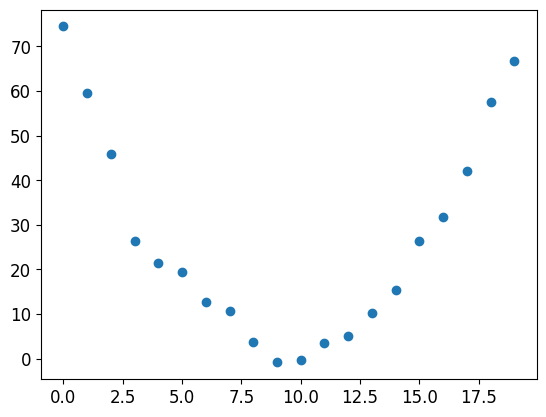

In [3]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

In [4]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [5]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [6]:
params = torch.randn(3).requires_grad_()

In [7]:
orig_params = params.clone()

In [8]:
preds = f(time, params)

In [9]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

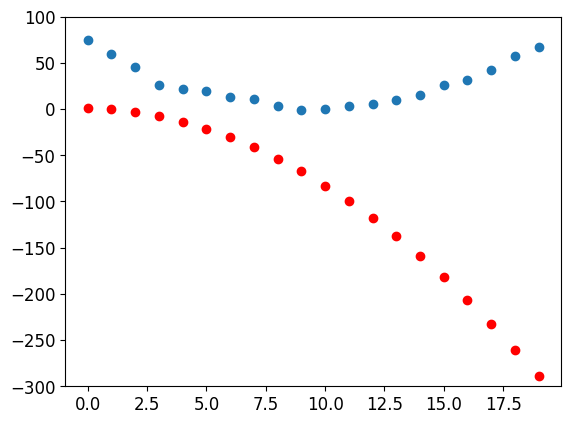

In [10]:
show_preds(preds)

In [11]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [12]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [13]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [14]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [15]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [16]:
preds = f(time,params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

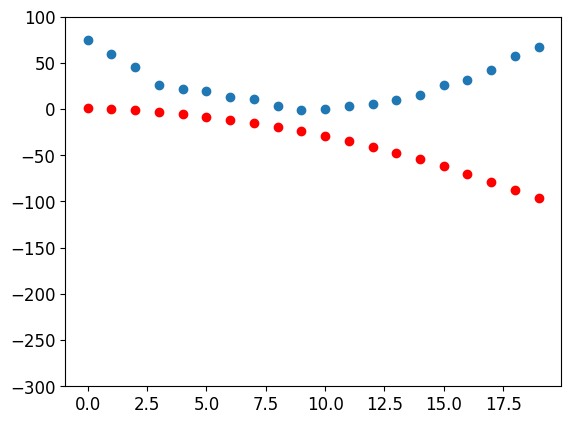

In [17]:
show_preds(preds)

In [18]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [19]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [20]:
params = orig_params.detach().requires_grad_()

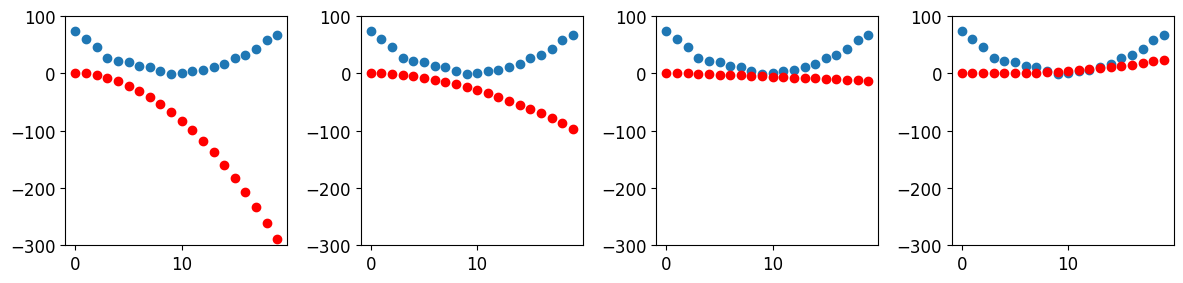

In [21]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()